# Name Fizza Tehreem

# Ag# 2022-ag-8639

In [1]:
#import pandas
import pandas as pd
#load dataset
df=pd.read_csv('house_data.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.isna().sum().sum()

7829

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#check shape
df.shape

(1460, 81)

In [7]:
#Drop unnecessary columns
df=df.drop(['BsmtHalfBath' , 'LowQualFinSF' , 'Id' , 'MSSubClass' , 'LotArea' , 'BsmtFinSF2' 
, 'OverallCond' , '3SsnPorch' , 'EnclosedPorch' , 'MiscVal' , 'MoSold', 'YrSold' , 
'ScreenPorch', 'PoolArea'],axis=1)

In [9]:
#Drop columns that have mostly null values
df=df.drop(['Alley','MasVnrType','MiscFeature','Fence','PoolQC','FireplaceQu'],axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   Street         1460 non-null   object 
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [15]:
#The columns that have object datatypes
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [17]:
#Drop the columns that have categorical values
df=df.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],axis=1)

In [25]:
#Replace null values with mean or median
columns_inter=['LotFrontage','GarageYrBlt','MasVnrArea']
df[columns_inter]=df[columns_inter].interpolate()

In [21]:
df.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   OverallQual   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   MasVnrArea    1460 non-null   float64
 5   BsmtFinSF1    1460 non-null   int64  
 6   BsmtUnfSF     1460 non-null   int64  
 7   TotalBsmtSF   1460 non-null   int64  
 8   1stFlrSF      1460 non-null   int64  
 9   2ndFlrSF      1460 non-null   int64  
 10  GrLivArea     1460 non-null   int64  
 11  BsmtFullBath  1460 non-null   int64  
 12  FullBath      1460 non-null   int64  
 13  HalfBath      1460 non-null   int64  
 14  BedroomAbvGr  1460 non-null   int64  
 15  KitchenAbvGr  1460 non-null   int64  
 16  TotRmsAbvGrd  1460 non-null   int64  
 17  Fireplaces    1460 non-null   int64  
 18  GarageYrBlt   1460 non-null 

In [29]:
#Make sure dataset have not any null value
df.isna().sum().sum()

0

In [31]:
#Find correlation
correlation=df.corr()
correlation

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
LotFrontage,1.000000,0.222694,0.110838,0.074961,0.164402,0.199707,0.116079,0.340918,0.390936,0.060287,...,0.222574,-0.011264,0.299428,0.220512,0.060803,0.255808,0.305227,0.066568,0.117151,0.310673
OverallQual,0.222694,1.000000,0.572323,0.550684,0.408650,0.239666,0.308159,0.537808,0.476224,0.295493,...,0.101676,-0.183882,0.427452,0.396765,0.512127,0.600671,0.562022,0.238923,0.308819,0.790982
YearBuilt,0.110838,0.572323,1.000000,0.592855,0.313659,0.249503,0.149040,0.391452,0.281986,0.010308,...,-0.070651,-0.174800,0.095589,0.147716,0.775012,0.537850,0.478954,0.224880,0.188686,0.522897
YearRemodAdd,0.074961,0.550684,0.592855,1.000000,0.178187,0.128451,0.181133,0.291066,0.240379,0.140024,...,-0.040581,-0.149598,0.191740,0.112581,0.615723,0.420622,0.371600,0.205726,0.226298,0.507101
MasVnrArea,0.164402,0.408650,0.313659,0.178187,1.000000,0.263452,0.112801,0.361005,0.340734,0.176031,...,0.104676,-0.037116,0.281308,0.250683,0.246489,0.362967,0.371416,0.160935,0.124355,0.474279
BsmtFinSF1,0.199707,0.239666,0.249503,0.128451,0.263452,1.000000,-0.495251,0.522396,0.445863,-0.137079,...,-0.107355,-0.081007,0.044316,0.260011,0.157172,0.224054,0.296970,0.204306,0.111761,0.386420
BsmtUnfSF,0.116079,0.308159,0.149040,0.181133,0.112801,-0.495251,1.000000,0.415360,0.317987,0.004469,...,0.166643,0.030086,0.250647,0.051575,0.179661,0.214175,0.183303,-0.005316,0.129005,0.214479
TotalBsmtSF,0.340918,0.537808,0.391452,0.291066,0.361005,0.522396,0.415360,1.000000,0.819530,-0.174512,...,0.050450,-0.068901,0.285573,0.339519,0.312769,0.434585,0.486665,0.232019,0.247264,0.613581
1stFlrSF,0.390936,0.476224,0.281986,0.240379,0.340734,0.445863,0.317987,0.819530,1.000000,-0.202646,...,0.127401,0.068101,0.409516,0.410531,0.220422,0.439317,0.489782,0.235459,0.211671,0.605852
2ndFlrSF,0.060287,0.295493,0.010308,0.140024,0.176031,-0.137079,0.004469,-0.174512,-0.202646,1.000000,...,0.502901,0.059306,0.616423,0.194561,0.066135,0.183926,0.138347,0.092165,0.208026,0.319334


<Axes: >

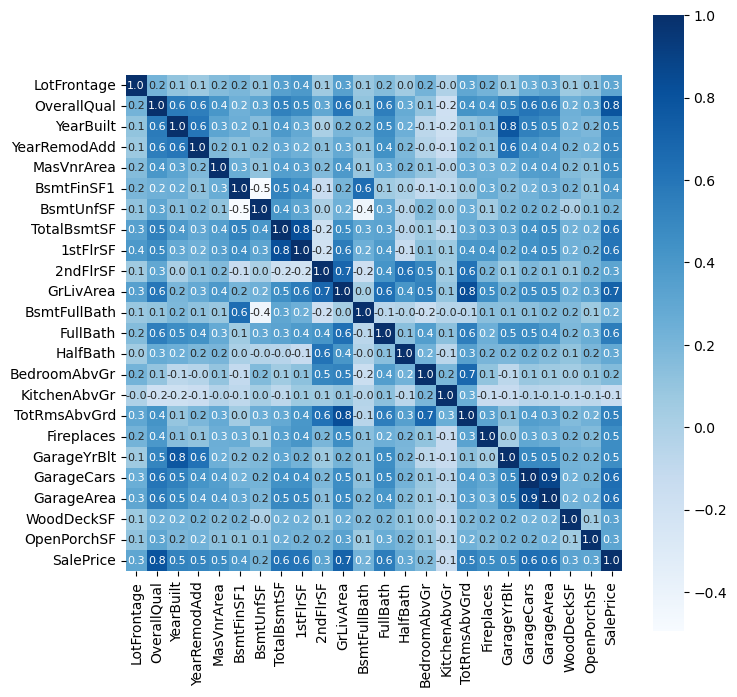

In [33]:
#import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(8,8))
#making heatmap
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', 
annot=True, annot_kws={'size':8}, cmap='Blues')

In [35]:

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score 

In [37]:
#import the numpy library
import numpy as np
X=df.values
Y=df['SalePrice'].values

In [43]:
#Seperate the target column from features
X=np.delete(X,23,axis=1)

In [45]:
print(X)

[[  65.    7. 2003. ...  548.    0.   61.]
 [  80.    6. 1976. ...  460.  298.    0.]
 [  68.    7. 2001. ...  608.    0.   42.]
 ...
 [  66.    7. 1941. ...  252.    0.   60.]
 [  68.    5. 1950. ...  240.  366.    0.]
 [  75.    5. 1965. ...  276.  736.   68.]]


In [47]:
print(Y)

[208500 181500 223500 ... 266500 142125 147500]


## 8+6+3+9/100=0.26

In [49]:
#Divide the samples for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.26,random_state=26)

In [51]:
#print the length of training and testing samples
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

1080
1080
380
380


In [53]:
#Train the linear regression model on training samples
from sklearn.linear_model import LinearRegression
fizza=LinearRegression()
fizza.fit(X_train,Y_train)
LinearRegression()

LinearRegression()

In [55]:
#Predict the training target columns for checking the accuracy
trainig_data_prediction=fizza.predict(X_train)
print(trainig_data_prediction)

[120471.96808736 316011.24286913 213056.32841646 ... 250053.0172068
 261095.25870331  81188.66644906]


In [57]:
#Checking the training accuracy
score_1=metrics.r2_score(Y_train,trainig_data_prediction)
score_2=metrics.mean_absolute_error(Y_train,trainig_data_prediction)
print("R sqquared",score_1)
print("Mean absolute error",score_2)

R sqquared 0.8395185933043154
Mean absolute error 20687.93472343577


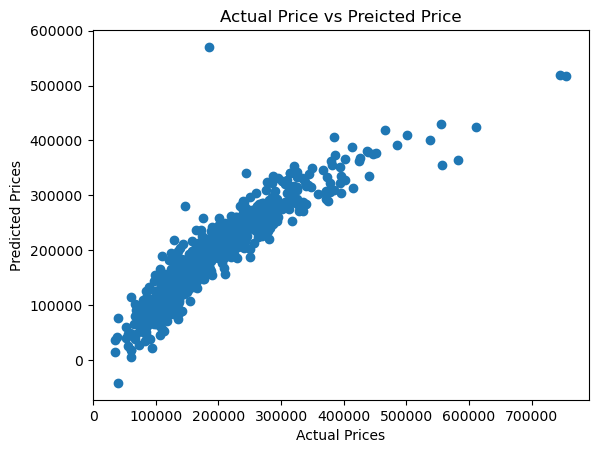

In [59]:
#Draw training accuracy using using matplotlib
plt.scatter(Y_train, trainig_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [61]:
#predict the values based on testing samples
y_pred=fizza.predict(X_test)
print(y_pred)

[336921.79390995 112291.36061154  78950.14713849 314352.43566949
 127644.18414493 231219.0906362   99542.80308949  88209.83702116
 114214.40968739  98945.37302632 160672.23591133 164327.59536678
 115534.01768806 130310.67698542 210050.64713916 140044.33451979
 253266.64746797 150957.38655751 327999.27228172 222617.67109678
 152196.88408869 192839.15300481 115888.47751671 121086.16828117
 288402.0926312  140146.4252965  207238.55811403  79964.86297996
 170682.04889143 186328.11175961 324160.42101984 156809.26949561
 148607.08131814 165198.43362251 188501.74985374 321573.04809227
 132363.83171929 163956.73272726 170027.62252218 238532.83834126
 134434.64031173 167333.04265324 283406.6037095  202469.31255585
 113035.61025176 157487.3368232  241772.04414774 158270.83841311
 148558.76451002 117338.79171702 216630.12844438 116486.55956732
  77460.51194953  91870.82933434 472082.64008553 362189.92738306
 128675.39263799 272222.60451032 208759.50734942 275948.70216027
 144590.44208461 137834.9

In [63]:

score_1=metrics.r2_score(Y_test,y_pred)
score_2=metrics.mean_absolute_error(Y_test,y_pred)
print("R sqquared",score_1)
print("Mean absolute error",score_2)

R sqquared 0.6104578014336104
Mean absolute error 24265.42555612515


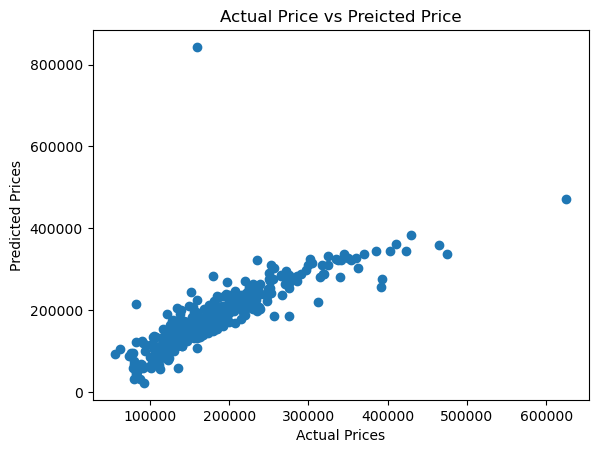

In [65]:
#graphical  representation of testing accuracy
plt.scatter(Y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# SVM

In [67]:
#import SVR from sklearn
from sklearn.svm import SVR
fizza = SVR(kernel='linear') 
fizza.fit(X_train, Y_train) 
SVR(kernel='linear')

SVR(kernel='linear')

In [69]:
#prdict the training values to check training accuracy
training_data_prediction = fizza.predict(X_train)
print(training_data_prediction)

[123024.71984688 299431.28897384 187936.66126883 ... 241243.45502952
 246278.47051147 105911.69359446]


R squared score :  0.7764117520276881
Mean Absolute Error :  23008.65741754602


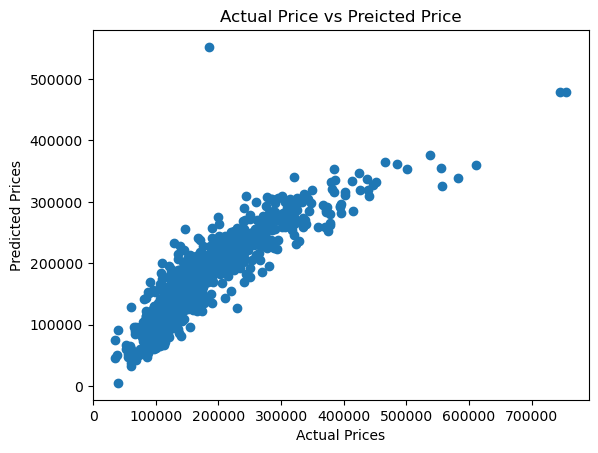

In [71]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, 
training_data_prediction)
print("R squared score : ", score_1)
print('Mean Absolute Error : ', score_2)
#graphical  representation of training accuracy
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [75]:
#predict values on testing data
y_pred=fizza.predict(X_test)
print(y_pred)

[307439.20537147 118228.49188304 109713.36880228 282684.05046207
 116161.75800696 185818.32293216 104270.09019635  93720.23613838
 127701.74144549 109607.660937   174057.84316513 153233.14287831
  96521.31206048 112228.60412547 186933.86215389 156055.33154598
 242381.5918051  160214.80898181 284719.58115033 212009.16298351
 154157.34417799 199675.35473937 115397.67669228 135981.23666636
 270145.92072735 119934.5635501  199753.10312257 102310.47128442
 130023.32758192 206950.90381033 278748.14843831 146451.66557135
 151942.03321267 159426.02137059 186830.53884367 302563.66772899
 121473.94814662 162739.90553332 144531.58700034 201896.36613131
 106922.95776418 125245.41471759 243586.21628061 184558.8537781
 116324.52157161 153448.36959809 236866.79766569 166393.21644965
 161991.04391221 108246.84036845 201266.60361597 118555.90614489
  83902.46762225  95749.7517449  429165.75960455 354837.14604924
 135631.71572081 250195.82525319 190209.08590195 245107.99403745
 146860.96459428 138401.75

In [77]:
score_1 = metrics.r2_score(Y_test, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, y_pred)

R squared Score :  0.5891258423156411
Mean Absolute Error :  24242.049440369774


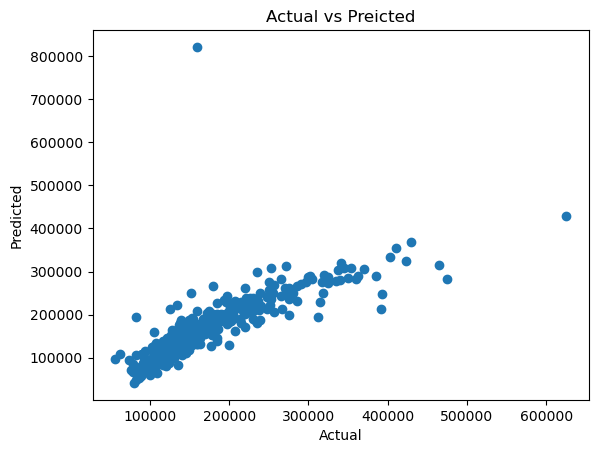

In [79]:
#graphical  representation of testing accuracy
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

# Decision Tree

In [82]:
#Apply decision tree algorithm
from sklearn.tree import DecisionTreeRegressor
fizza=DecisionTreeRegressor(random_state=26)
fizza.fit(X_train,Y_train)
DecisionTreeRegressor(random_state=26)

DecisionTreeRegressor(random_state=26)

In [84]:
#predict the training values
training_data_prediction = fizza.predict(X_train)
print(training_data_prediction)

[127000. 325624. 190000. ... 210000. 228500.  93000.]


In [88]:
# R squared score
score_1 = metrics.r2_score(Y_train, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("R squared score : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared score :  0.9999966622724712
Mean Absolute Error :  6.340740740740741


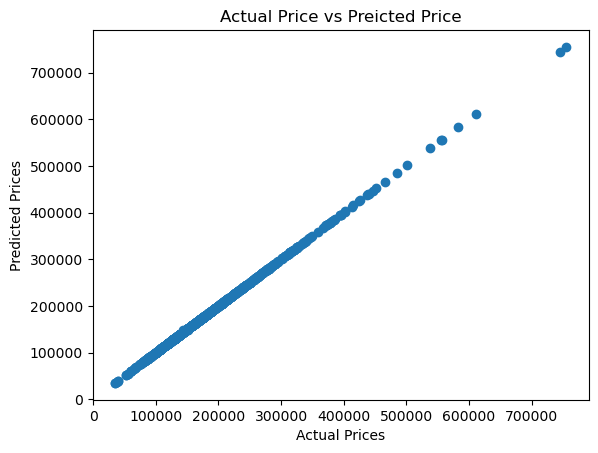

In [90]:
#graphical  representation of training accuracy
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [94]:
#Prediction of Y
y_pred = fizza.predict(X_test)
y_pred

array([305900., 117500., 116050., 336000., 138000., 220000., 124500.,
        87000.,  85400., 109900., 159000., 143750.,  85400., 110000.,
       210000., 176000., 227000., 155000., 556581., 231500., 158000.,
       181000., 135000., 135000., 309000., 124500., 185000., 116050.,
       122000., 140000., 310000., 136500., 109000.,  97500., 158000.,
       424870., 135900., 115000., 155000., 180000., 135000., 170000.,
       314813., 202665., 108000., 140000., 210000., 163990., 118500.,
       113000., 274725., 130000.,  64500., 126500., 745000., 381000.,
       125000., 270000., 174000., 248000., 159000., 149900., 109000.,
       163000., 100000., 127500., 241500., 160000., 256300.,  86000.,
       260000.,  97000., 279500., 110000., 206000., 154500., 168000.,
       149900., 197000., 152000., 144000.,  52000., 175500.,  76500.,
       121600., 154500., 179500., 145000., 184100., 206000., 120500.,
        84900., 127500., 136500.,  86000., 140000., 137000., 146000.,
       142000., 2700

In [96]:
# R squared score
score_1 = metrics.r2_score(Y_test, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, y_pred)
print("R squared score : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared score :  0.46796782427656713
Mean Absolute Error :  31908.444736842106


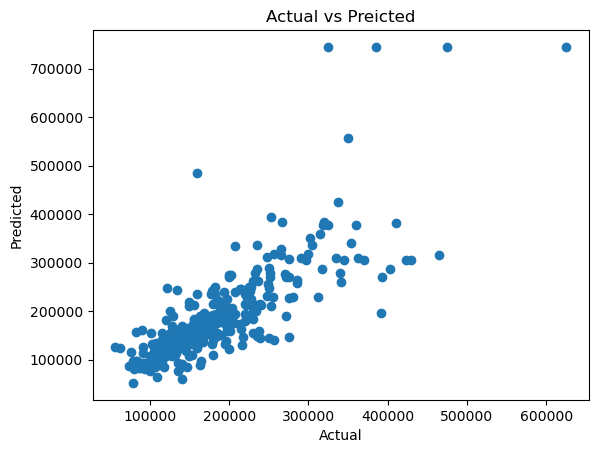

In [98]:
#graphical  representation of testing accuracy
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

# Random Forest Regression

In [101]:
#import the random forest from sklearn
from sklearn.ensemble import RandomForestRegressor
fizza = RandomForestRegressor(n_estimators=5, random_state=26)

In [103]:
#fit the model with X and Y data 
fizza.fit(X_train, Y_train) 
RandomForestRegressor(n_estimators=5, random_state=26)

RandomForestRegressor(n_estimators=5, random_state=26)

In [105]:
training_data_prediction = fizza.predict(X_train)
print(training_data_prediction)

[125580.  386239.6 191580.  ... 235700.  237900.  108280. ]


In [107]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, 
training_data_prediction)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.960918196886466
Mean Absolute Error :  8710.067222222222


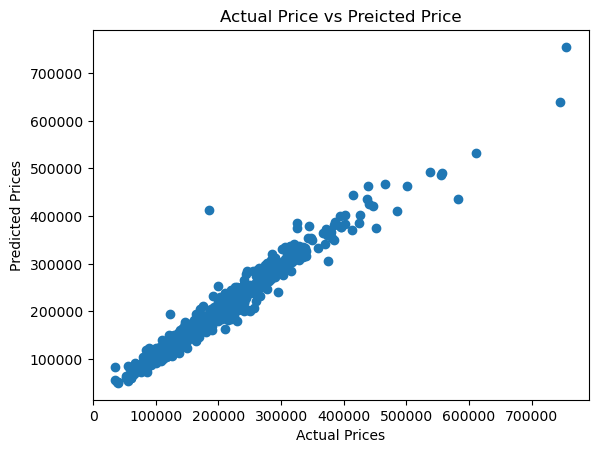

In [109]:
#graphical  representation of training accuracy
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [113]:
#Predict the y column based on testing X samples
y_pred = fizza.predict(X_test)
y_pred

array([342300. , 126600. , 116050. , 282942.6, 146500. , 207440. ,
       118800. , 102160. , 100100. , 110500. , 154230. , 138960. ,
       109900. , 110500. , 161700. , 142314. , 277070. , 153000. ,
       349900. , 221800. , 157700. , 168060. , 130200. , 128100. ,
       278785.2, 134100. , 183400. , 114000. , 176645. , 167490. ,
       342084.8, 145860. , 121140. , 135400. , 178700. , 398394. ,
       138900. , 142600. , 161200. , 231426.4, 118080. , 150480. ,
       284286.4, 200549. , 124260. , 143420. , 226187. , 183384.8,
       138420. , 119120. , 169160. , 120690. ,  82900. , 119080. ,
       636600. , 359630.8, 133572. , 266900. , 198283. , 266200. ,
       144950. , 135000. , 110980. , 143310. , 116650. , 129100. ,
       177440. , 153340. , 279126.6,  89600. , 332028.4,  96220. ,
       222800. , 129486.8, 208475.6, 136780. , 175800. , 122930. ,
       195640. , 174000. , 151700. ,  95450. , 169100. ,  87500. ,
       106900. , 132750. , 152800. , 180200. , 257742. , 19728

In [115]:
# R squared Score
score_1 = metrics.r2_score(Y_test, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, y_pred)
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared Score :  0.787491170290998
Mean Absolute Error :  20517.473684210527


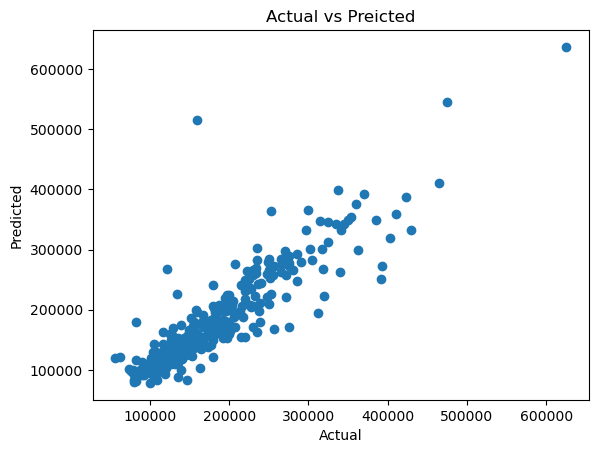

In [117]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

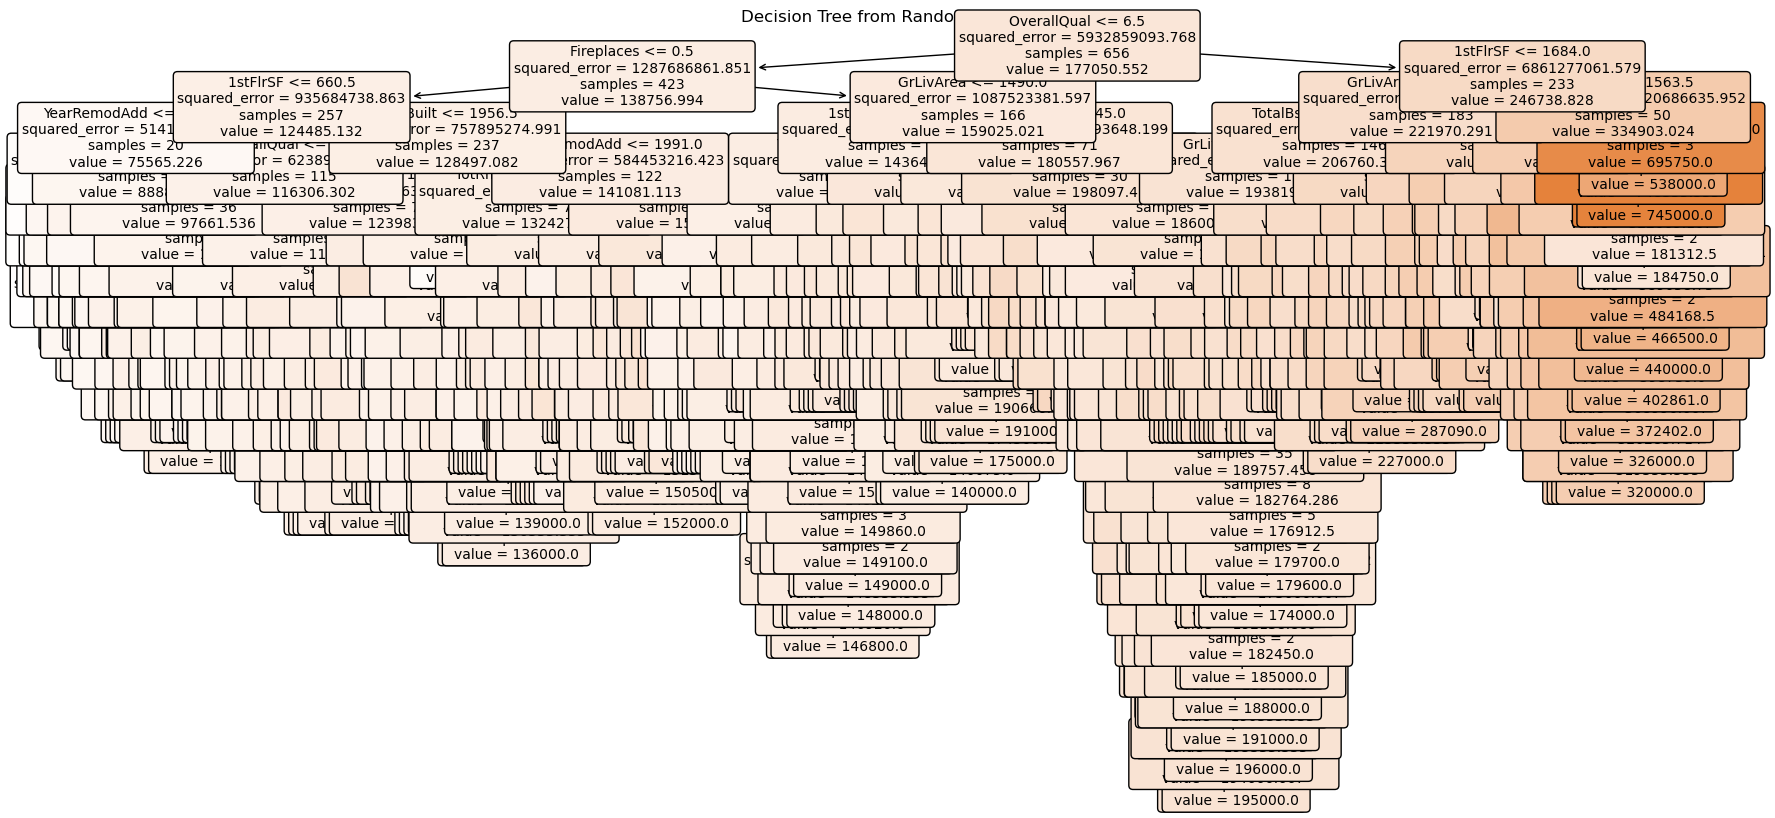

In [119]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = fizza.estimators_[0]
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), 
filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

## Random Forest perform very well as compare to others

## Decision Tree create overfitting situation 99% accuracy in training and 40% in testing

## SVM creates underfitting situation